In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
# 1. Load Data
df = pd.read_csv('video_games_sales.csv')

In [6]:
# 2. Preprocessing
# Hapus baris kosong
df_clean = df.dropna().copy()
# Ubah tahun jadi integer
df_clean['Year'] = df_clean['Year'].astype(int)

In [7]:
# --- KODE LAMA (Penyebab Warning) ---
# X = df_clean[['Platform', 'Year', 'Genre', 'Publisher']]

# --- KODE BARU (Solusi) ---
# Tambahkan .copy() agar X menjadi dataframe yang berdiri sendiri
X = df_clean[['Platform', 'Year', 'Genre', 'Publisher']].copy()

# Sekarang proses encoding tidak akan memunculkan warning
le = LabelEncoder()
for col in ['Platform', 'Genre', 'Publisher']:
    # Gunakan .loc untuk lebih aman (best practice), meski X[col] saja sudah tidak error setelah .copy()
    X.loc[:, col] = le.fit_transform(X[col])

In [8]:
# 3. Split Data (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# 4. Train Model (Random Forest)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [10]:
# 5. Prediksi
y_pred = model.predict(X_test)

In [11]:
# 6. Evaluasi
print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
print(f"R2 Score: {r2_score(y_test, y_pred)}")

MAE: 0.5404081877957781
R2 Score: 0.027863874177187165


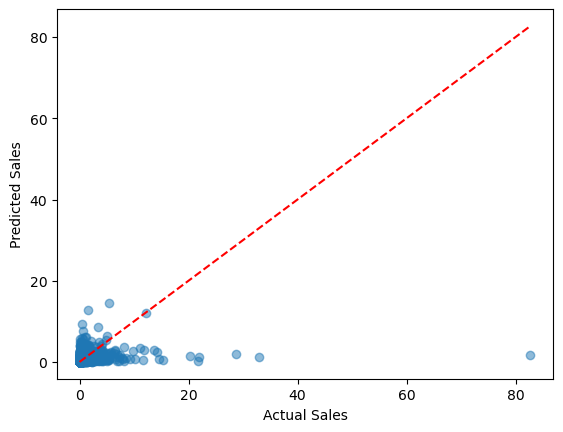

In [12]:
# 7. Plotting
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.show()